In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from csv and getting info about data

In [7]:
data = pd.read_csv('/content/netflix1.csv.zip')



# Display the first five rows of the dataset

data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
data.shape

(8790, 10)

In [10]:
data=data.drop_duplicates()

Content distribution on Netflix

In [11]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


Text(0.5, 0.98, 'Total Content on Netflix')

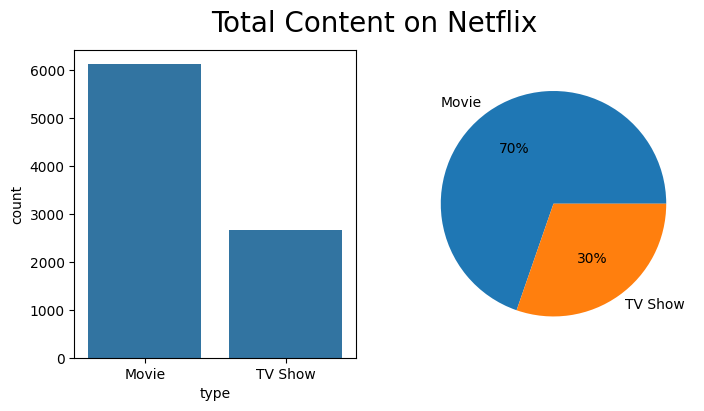

In [15]:
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Most Common Genres

<ipython-input-17-f2954d58e93f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


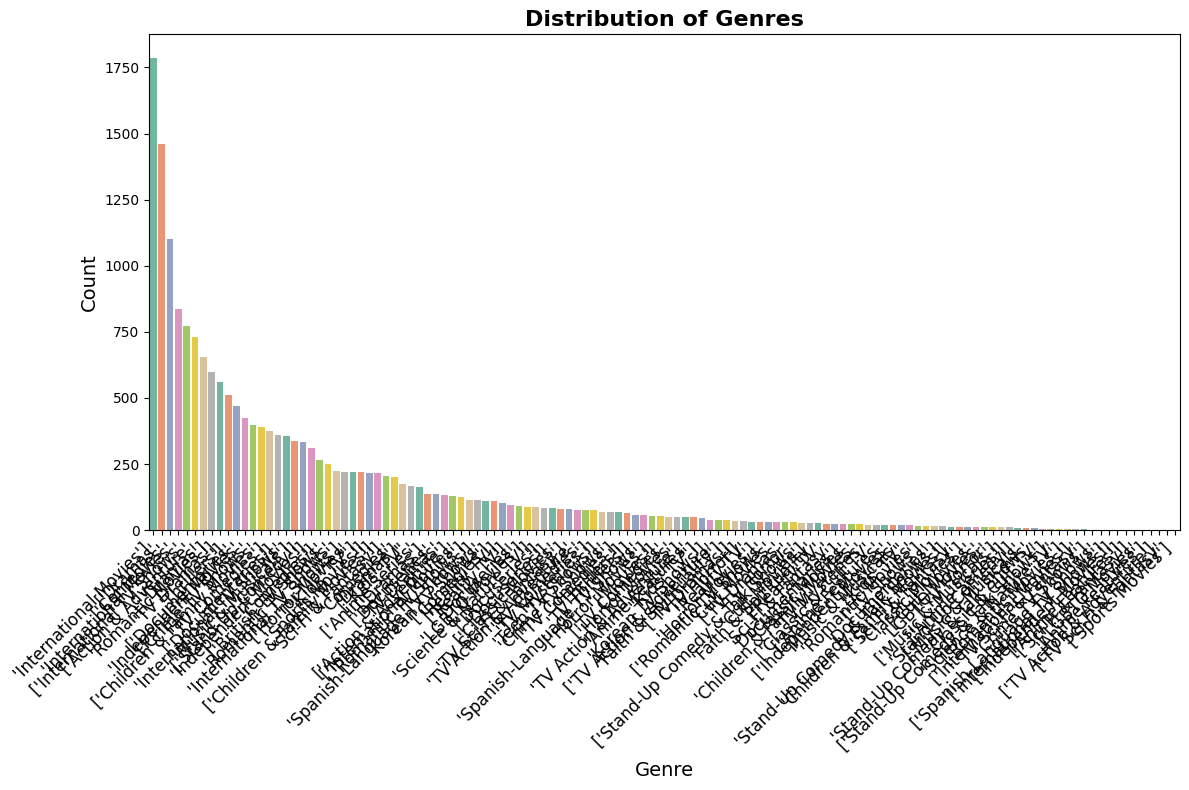

In [17]:
# Split the 'listed_in' column and count genres
data['listed_in'] = data['listed_in'].astype(str)
data['listed_in'] = data['listed_in'].str.split(', ')
data_exploded = data.explode('listed_in')
genre_counts = data_exploded['listed_in'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))

sns.barplot(
    x='Genre',
    y='Count',
    data=genre_counts,
    palette='Set2'
)
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Content Added Over Time

In [48]:
# Extract year and month from 'date_added'

data['year_added'] = data['date_added'].dt.year

data['month_added'] = data['date_added'].dt.month

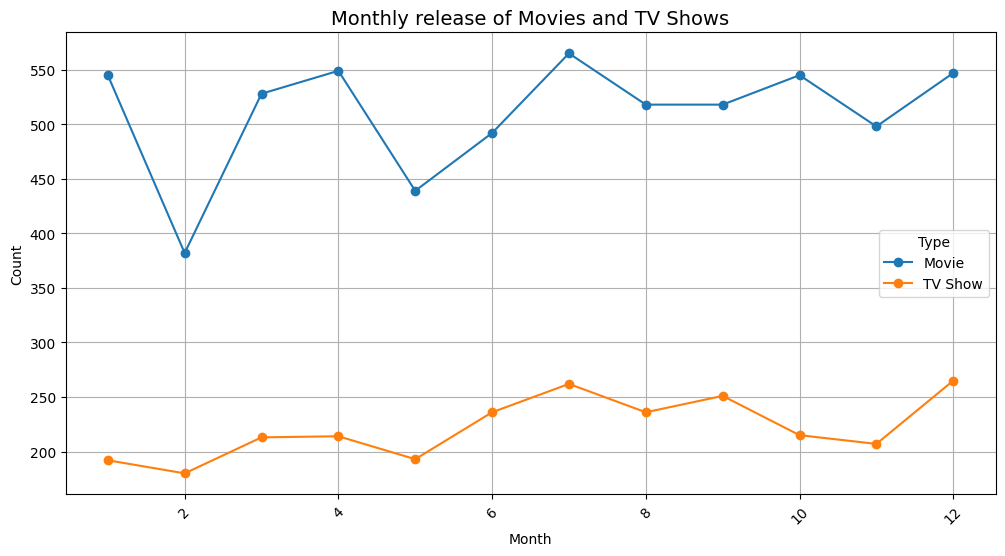

In [49]:
# Plot content added over the months using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Monthly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

Top 10 Directors with the Most Titles


<ipython-input-9-e80ed363d1a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')


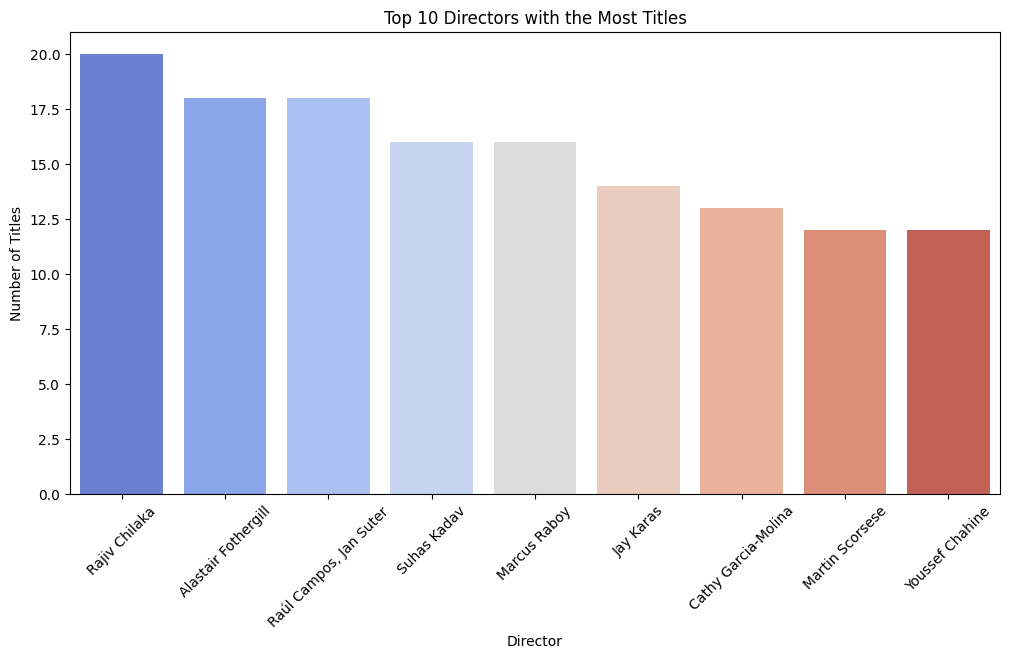

In [9]:
top_directors = data['director'].value_counts()[1:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

Word Cloud of Movie Titles

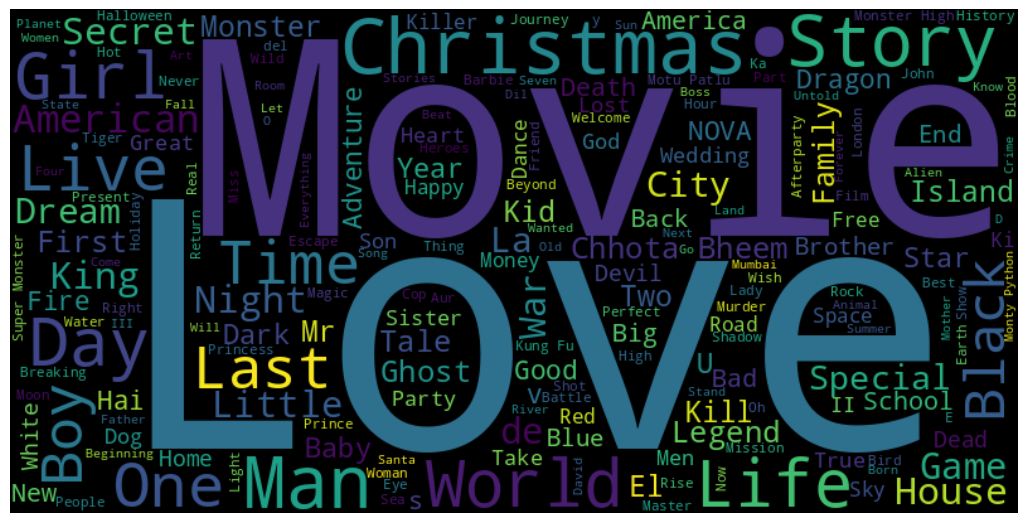

In [55]:
!pip install wordcloud
from wordcloud import WordCloud

# Create a word cloud for movie titles

movie_titles = data[data['type'] == 'Movie']['title']

wordCloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))



# Display the word cloud

plt.figure(figsize=(13, 7))

# Get the word cloud image as a NumPy array using to_array()
plt.imshow(wordCloud.to_array(), interpolation='bilinear')

plt.axis('off')

plt.show()

Conclusion and Insights

Through this analysis, we have gained valuable insights into the Netflix dataset. We have explored the distribution of content types, genres, and directors, as well as the world cloud of movie titles. The findings of this analysis can be used to inform content acquisition and production strategies, as well as to identify opportunities for growth and improvement.

Key Insights:

The majority of Netflix content is Movies.

The most popular genres are Documentaries, TV Dramas, and Comedies.

In monthly releases movies are added more than TV show.

List of top 10 directors with most titles.

The word cloud of movie titles highlights the diversity of content available on Netflix.


